<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Ejercicio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalar kaggle
!pip install -q kaggle

#Crear el directorio de kaggle y copiar el archivo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Cambiar los permisos
!chmod 600 ~/.kaggle/kaggle.json

#Descargar el dataset
!kaggle datasets download -d puneet6060/intel-image-classification

#Descomprimir el dataset
!unzip -q intel-image-classification.zip -d lugares_dataset

# Eliminar el archivo zip
!rm intel-image-classification.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 346M/346M [00:08<00:00, 86.2MB/s]
100% 346M/346M [00:08<00:00, 45.3MB/s]


In [2]:
import os

#Verificar el contenido del directorio
print('Contenido del directorio')
print(os.listdir('lugares_dataset'))

"""#Ajustar las rutas del directorio
lugares_dataset_dir = 'lugares_dataset'

#Verificar el contenido del directorio
print('Contenido del directorio')
print(os.listdir(lugares_dataset_dir))"""


Contenido del directorio
['seg_test', 'seg_pred', 'seg_train']


"#Ajustar las rutas del directorio\nlugares_dataset_dir = 'lugares_dataset'\n\n#Verificar el contenido del directorio\nprint('Contenido del directorio')\nprint(os.listdir(lugares_dataset_dir))"

In [6]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [23]:
# Configurar los generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% de los datos para validación
)

train_generator = train_datagen.flow_from_directory(
    'lugares_dataset/seg_train/seg_train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'lugares_dataset/seg_train/seg_train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [24]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')  # 6 clases en el dataset
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 105s 278ms/step - accuracy: 0.4796 - loss: 1.3351 - val_accuracy: 0.6774 - val_loss: 0.8315
Epoch 2/10
  1/350 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.5938 - loss: 1.1523

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5938 - loss: 1.1523 - val_accuracy: 0.7000 - val_loss: 1.0795
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 128s 256ms/step - accuracy: 0.6873 - loss: 0.8231 - val_accuracy: 0.7288 - val_loss: 0.7154
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.7500 - loss: 0.7498 - val_accuracy: 0.7000 - val_loss: 0.7394
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 90s 253ms/step - accuracy: 0.7385 - loss: 0.7081 - val_accuracy: 0.8075 - val_loss: 0.5530
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6875 - loss: 0.7704 - val_accuracy: 0.9000 - val_loss: 0.2913
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 89s 250ms/step - accuracy: 0.7953 - loss: 0.5839 - val_accuracy: 0.7942 - val_loss: 0.5676
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8438 - loss: 0.5440 - val_accuracy: 0.8500 - val_loss: 0.4461
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 90s 250ms/step - accuracy: 0.8178 - loss: 0.5136 - val_accur

In [26]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


87/87 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.8205 - loss: 0.5197
Validation accuracy: 82.22%


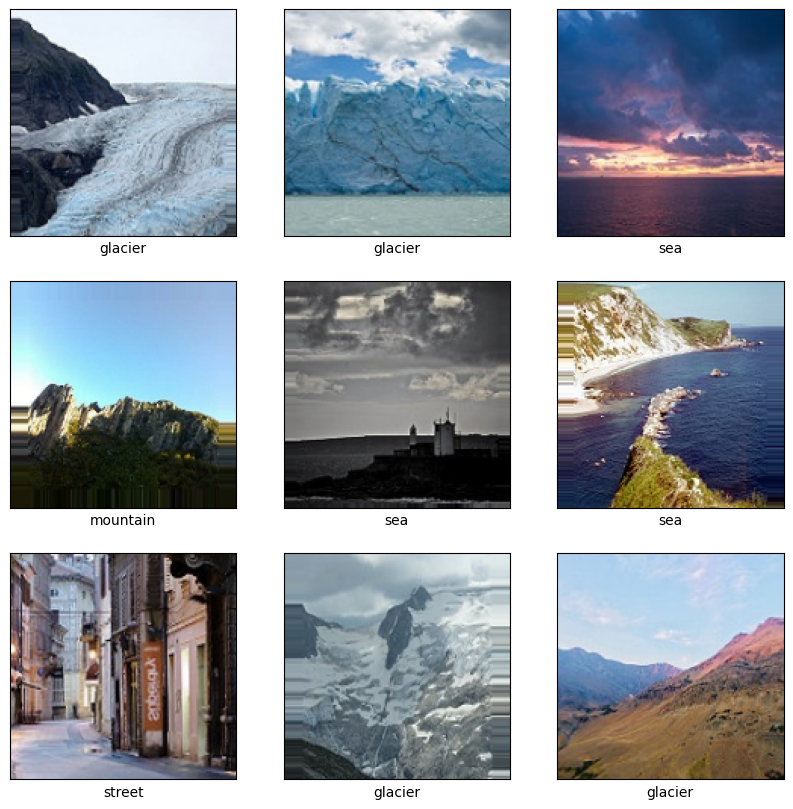

In [27]:
import matplotlib.pyplot as plt

# Obtener un lote de imágenes y etiquetas del generador de datos
images, labels = next(train_generator)

# Decodificar las etiquetas categóricas a nombres de clases
class_names = list(train_generator.class_indices.keys())

# Número de imágenes a mostrar
num_images = 9

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    label = class_names[np.argmax(labels[i])]
    plt.xlabel(label)

plt.show()

In [28]:
# Obtener el número total de muestras en el conjunto de validación
num_samples = validation_generator.samples

# Realizar predicciones en el conjunto de validación
validation_generator.reset()
predictions = model.predict(validation_generator, steps=num_samples // validation_generator.batch_size + 1)

# Asegúrate de que y_true y y_pred tengan la misma longitud
y_true = validation_generator.classes[:len(predictions)]
y_pred = np.argmax(predictions, axis=1)[:len(predictions)]


88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step


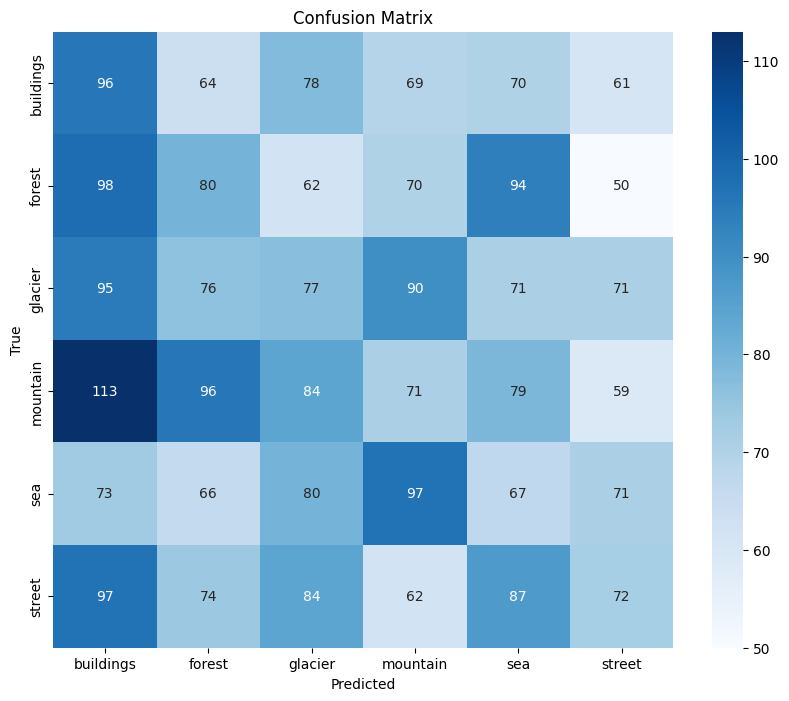

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


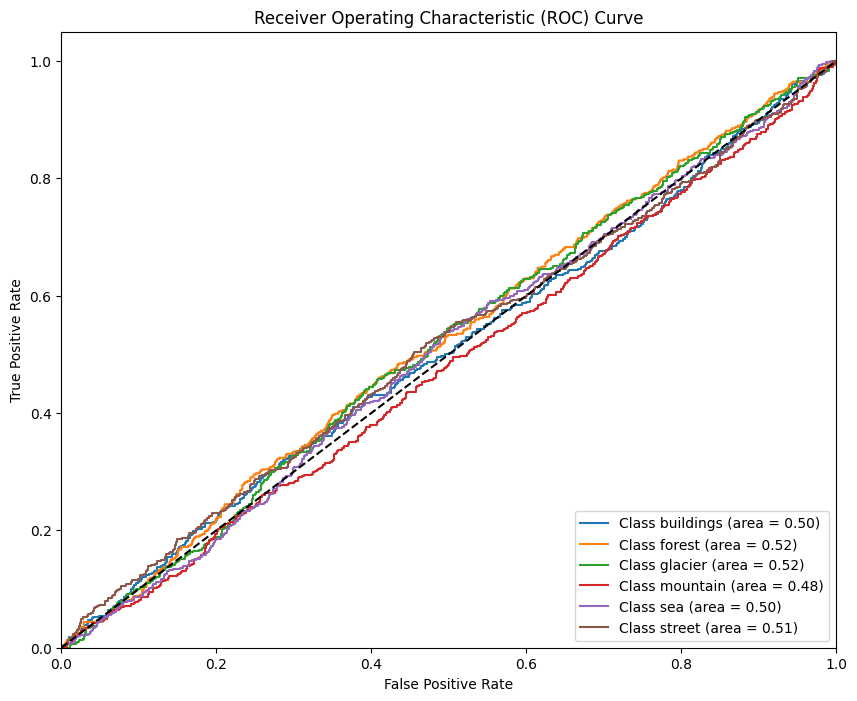

In [30]:
#ROC Y AUC

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas verdaderas
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3, 4, 5])

# Calcular las curvas ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [31]:
#F1-SCORE

from sklearn.metrics import classification_report, f1_score

# Calcular el F1-score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'F1-score: {f1:.2f}')

# Mostrar el informe de clasificación
print(classification_report(y_true, y_pred, target_names=class_names))


F1-score: 0.16
              precision    recall  f1-score   support

   buildings       0.17      0.22      0.19       438
      forest       0.18      0.18      0.18       454
     glacier       0.17      0.16      0.16       480
    mountain       0.15      0.14      0.15       502
         sea       0.14      0.15      0.15       454
      street       0.19      0.15      0.17       476

    accuracy                           0.17      2804
   macro avg       0.17      0.17      0.16      2804
weighted avg       0.17      0.17      0.16      2804



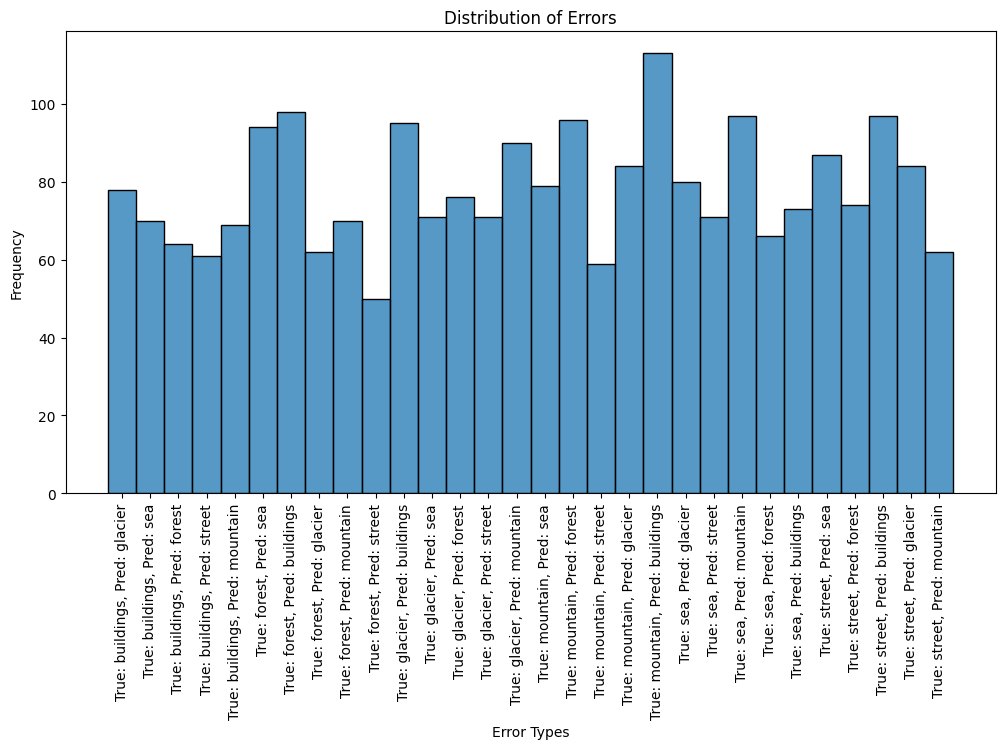

In [32]:
#Graficar la distribucion de los errores
# Graficar la distribución de los errores
errors = y_true != y_pred
error_labels = [f'True: {class_names[t]}, Pred: {class_names[p]}' for t, p in zip(y_true[errors], y_pred[errors])]

plt.figure(figsize=(12, 6))
sns.histplot(error_labels, kde=False)
plt.xticks(rotation=90)
plt.xlabel('Error Types')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()
